<a href="https://colab.research.google.com/github/sai-darshan-k/Advanced-Machine-Learning/blob/main/2348548_ETE1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1). Sinusoildal Signal

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as wavfile

In [ ]:
amp = 1
freq = 5
t = 1
fs = 1000


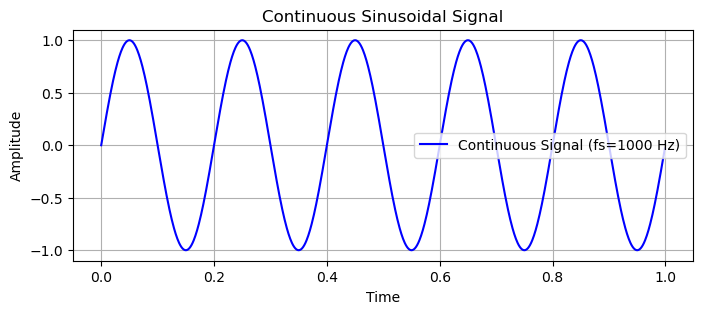

In [ ]:
# continuous signal
t_cont = np.linspace(0, t, int(fs * t), endpoint=False)
signal_cont = amp * np.sin(2 * np.pi * freq * t_cont)

#plot for same
plt.figure(figsize=(8, 3))
plt.plot(t_cont, signal_cont, label='Continuous Signal (fs=1000 Hz)', color='b')
plt.title('Continuous Sinusoidal Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()


#### 1.b) Discrete Sampling rate of 20Hz, 40Hz, 100Hz

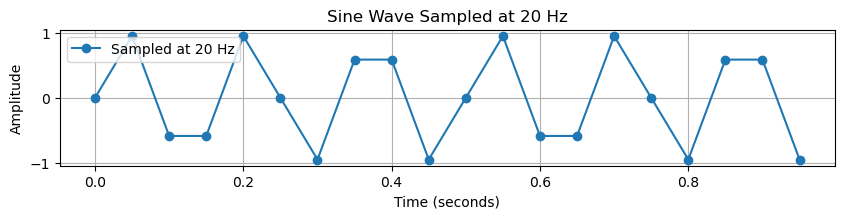

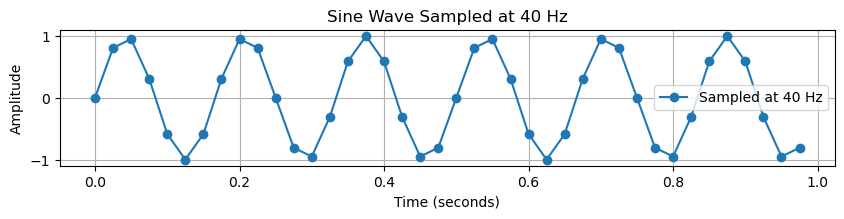

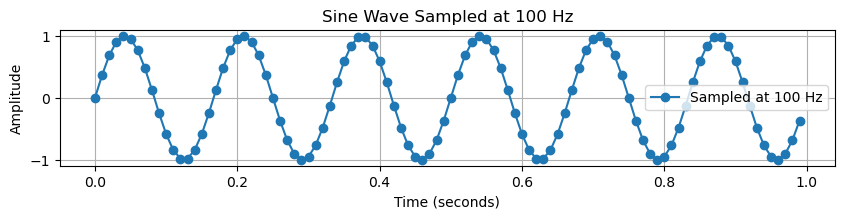

In [ ]:
# Sine wave parameters
A = 1
f = 6
theta = 0

sampling_rates = [20, 40, 100]

duration=1

for i, fs in enumerate(sampling_rates):
    # Time points at which to sample the signal
    t = np.linspace(0, duration, int(fs * duration), endpoint=False)

    # Generate the sine wave at this sampling rate
    sinusoidal_wave = sine_wave(A, f, t, theta)

    #plot the waves
    plt.figure(figsize=(10, 6))
    plt.subplot(len(sampling_rates), 1, i + 1)
    plt.plot(t, sinusoidal_wave,'o-', label=f'Sampled at {fs} Hz')
    plt.title(f'Sine Wave Sampled at {fs} Hz')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.legend()


plt.show()

### c) Inference
Discrete Signals: The graph is represented in three discrete signals, each represented by a different color (red, green, and blue).
Sampling Rates: The x-axis represents time (in seconds), and the y-axis represents amplitude. The signals are sampled at rates of 20 Hz, 40 Hz, and 100 Hz.
Increasing Sampling Rate: As the sampling rate increases, the density of data points on the graph also increases, resulting in a better representation of the underlying continuous sinusoidal wave.


## 2) Discrete-time sinusoidal signal

### (a) Plot original discrete-time sinusoidal signal over 200 samples

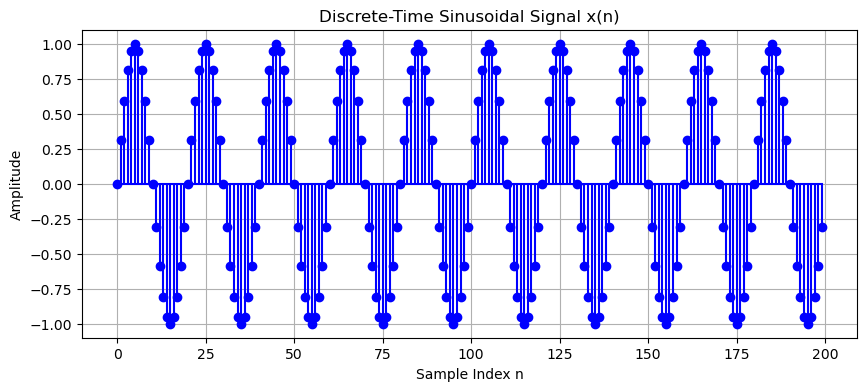

In [ ]:
f0 = 50
Fs = 1000
N = 200
n = np.arange(N)
x_n = np.sin(2 * np.pi * f0 / Fs * n)
plt.figure(figsize=(10, 4))
plt.stem(n, x_n, basefmt='b-', linefmt='b-', markerfmt='bo')
plt.title('Discrete-Time Sinusoidal Signal x(n)')
plt.xlabel('Sample Index n')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

#### (b) Compute the Discrete Time Fourier Transform (DTFT)

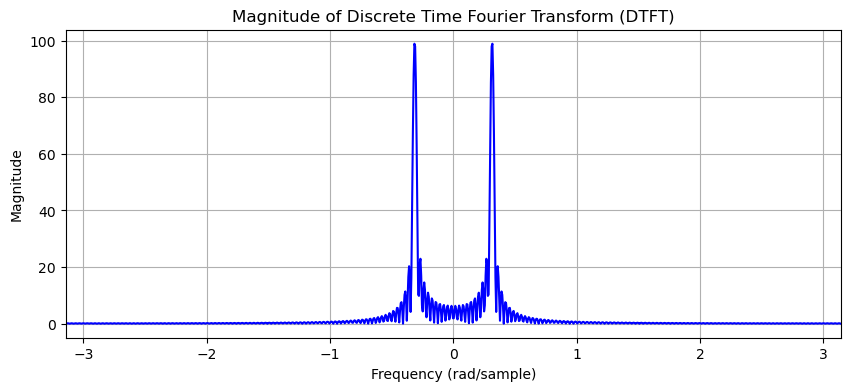

In [ ]:
def compute_dtft(signal):
    N_dtft = 1024
    omega = np.linspace(-np.pi, np.pi, N_dtft)
    dtft = np.zeros(N_dtft, dtype=complex)
    for k in range(N_dtft):
        dtft[k] = np.sum(signal * np.exp(-1j * omega[k] * n))

    return omega, dtft
omega, dtft = compute_dtft(x_n)

plt.figure(figsize=(10, 4))
plt.plot(omega, np.abs(dtft), color='b')
plt.title('Magnitude of Discrete Time Fourier Transform (DTFT)')
plt.xlabel('Frequency (rad/sample)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim([-np.pi, np.pi])
plt.show()

### (c) Compute Discrete Fourier Transform (DFT)

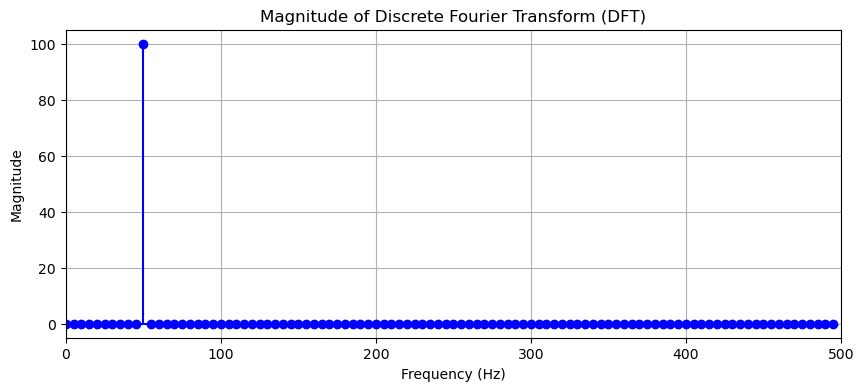

In [ ]:
def compute_dft(signal):
    dft = np.fft.fft(signal)
    return dft
dft = compute_dft(x_n)

# computing frequency bins
frequencies = np.fft.fftfreq(N, d=1/Fs)

# plot
plt.figure(figsize=(10, 4))
plt.stem(frequencies, np.abs(dft), basefmt='b-', linefmt='b-', markerfmt='bo')
plt.title('Magnitude of Discrete Fourier Transform (DFT)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(0, Fs/2)
plt.show()

### d) Inference
The dtft provides a continuous representation of the frequency content of the signal,
   where the dft gives discrete frequency components.The dtft is calculated over an infinite frequency range, while the dft is computed for a finite set
   of frequencies, specifically the points corresponding to the sampling rate.The dft can be computed efficiently using the fft-fast fouruer transform, which is not for dtft.The dtft plot appears smoother due to its continuous nature, whereas the dtft plot has discrete peaks corresponding
   to the frequencies present in the original signal.

## 3)  Source-filter model for speech synthesis

#### (a)descrete-time source signal (glottal pulse)

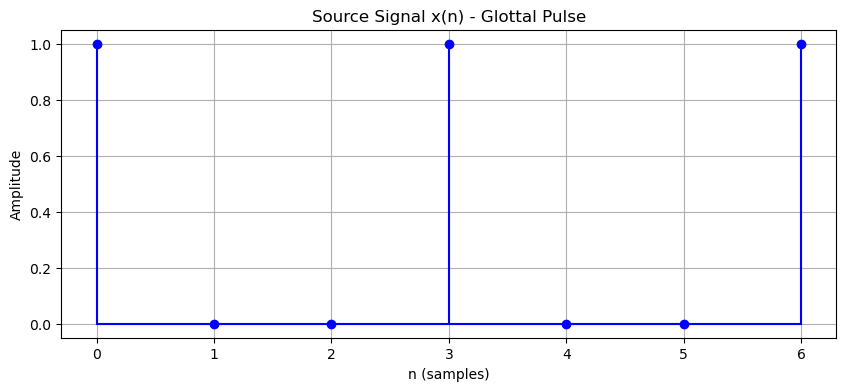


Source signal x(n): [1 0 0 1 0 0 1]


In [ ]:
%matplotlib inline

#source signal-glottal pulse
def generate_source_signal():
    x_n = np.array([1, 0, 0, 1, 0, 0, 1])
    plt.figure(figsize=(10, 4))
    plt.stem(range(len(x_n)), x_n, basefmt='b-', linefmt='b-', markerfmt='bo')
    plt.title('Source Signal x(n) - Glottal Pulse')
    plt.xlabel('n (samples)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()

    return x_n
x_n = generate_source_signal()
print("\nSource signal x(n):", x_n)


b) Vocal tract model using impulse response

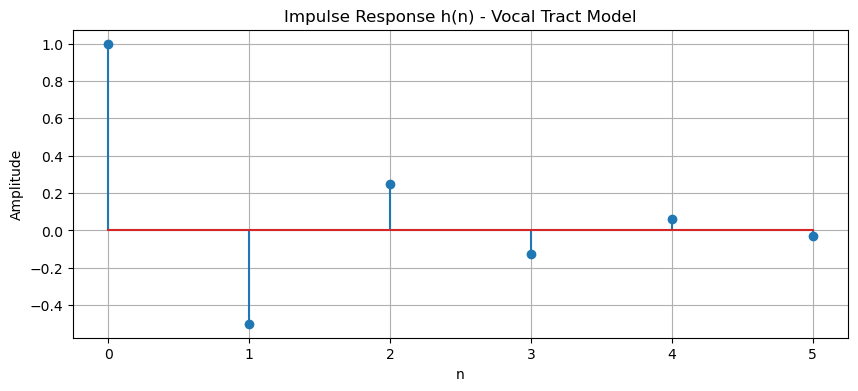

In [ ]:
# defining vocal tract model
def define_vocal_tract():
    h_n = np.array([1, -0.5, 0.25, -0.125, 0.0625, -0.03125])

    plt.figure(figsize=(10, 4))
    plt.stem(range(len(h_n)), h_n)
    plt.title('Impulse Response h(n) - Vocal Tract Model')
    plt.xlabel('n')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()

    return h_n
h_n = define_vocal_tract()


c) Linear  Convolution between x(n) and h(n) to generate y(n) which is speech signal

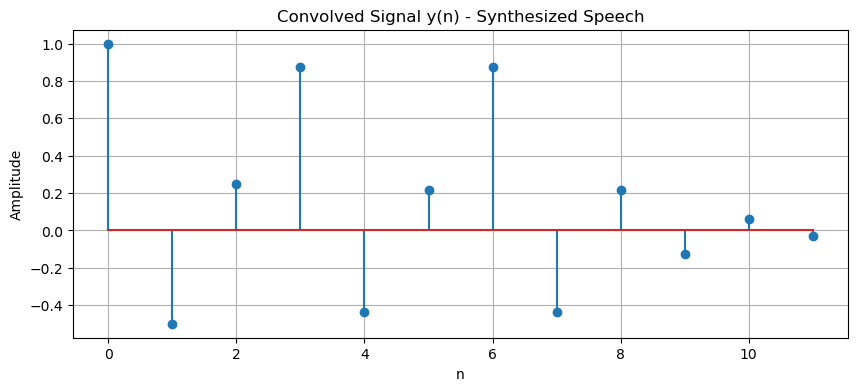

In [ ]:
def perform_convolution(x_n, h_n):
    y_n = np.convolve(x_n, h_n, mode='full')

    plt.figure(figsize=(10, 4))
    plt.stem(range(len(y_n)), y_n)
    plt.title('Convolved Signal y(n) - Synthesized Speech')
    plt.xlabel('n')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()

    return y_n
y_n = perform_convolution(x_n, h_n)

d) Inference on how the filtering process shapes the source signal based on the convolution result

The filtering process shapes the source signal in the following ways:
1. The impulse response h(n) acts as a shaping filter that modifies the spectral characteristics
   of the source signal.
2.The alternating positive and negative coefficients in h(n) create a resonant effect,
   simulating the natural resonances of the vocal tract.
3. The decreasing magnitude of h(n) coefficients produces a damping effect on the
 output,
   making it more natural-sounding.
4. Each impulse in the source signal gets spread out and shaped by the filter,
   creating a more complex waveform that better represents human speech characteristics.